In [105]:
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage

import seaborn as sns

import numpy as np

import umap

In [106]:
np.__version__

'2.1.3'

In [107]:
german_credit_df = pd.read_csv('german_credit_data.csv')
german_credit_df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


Отбросим столбец с номером и скопируем DF.

In [108]:
eda_df = german_credit_df.drop(columns=['Unnamed: 0']).copy()
eda_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


Посмотрим записи с пропусками.

In [109]:
eda_df[eda_df.isna().any(axis=1)]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
8,61,male,1,own,rich,NaN,3059,12,radio/TV
...,...,...,...,...,...,...,...,...,...
991,34,male,1,own,moderate,NaN,1569,15,radio/TV
992,23,male,1,rent,NaN,little,1936,18,radio/TV
994,50,male,2,own,NaN,NaN,2390,12,car
995,31,female,1,own,little,NaN,1736,12,furniture/equipment


Пропусков слишком много. Обозначим значение NaN как отдельный флаг.
Сделаем One-hot-encoding для категориальных переменных.

<Axes: xlabel='Age'>

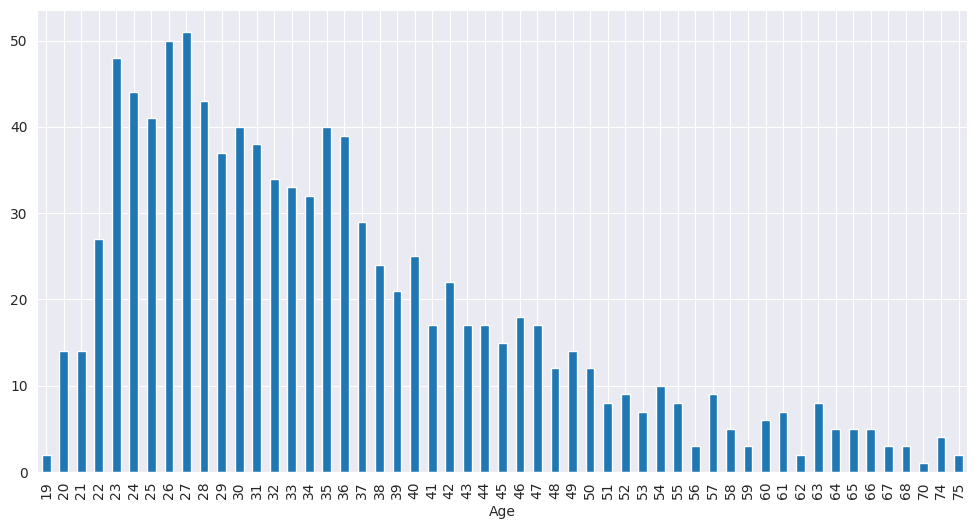

In [110]:
eda_df['Age'].value_counts().sort_index().plot.bar(figsize=(12, 6))

In [111]:
eda_df['Sex'] = german_credit_df['Sex'].map({'male': 1, 'female': 0})
eda_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,own,NaN,little,1169,6,radio/TV
1,22,0,2,own,little,moderate,5951,48,radio/TV
2,49,1,1,own,little,NaN,2096,12,education
3,45,1,2,free,little,little,7882,42,furniture/equipment
4,53,1,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,0,1,own,little,NaN,1736,12,furniture/equipment
996,40,1,3,own,little,little,3857,30,car
997,38,1,2,own,little,NaN,804,12,radio/TV
998,23,1,2,free,little,little,1845,45,radio/TV


Пропусков слишком много. Обозначим значение NaN как отдельный флаг.



In [112]:
eda_df['Housing'] = german_credit_df['Housing'].map({'free': 0, 'rent': 1, 'own': 2})
eda_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,2,NaN,little,1169,6,radio/TV
1,22,0,2,2,little,moderate,5951,48,radio/TV
2,49,1,1,2,little,NaN,2096,12,education
3,45,1,2,0,little,little,7882,42,furniture/equipment
4,53,1,2,0,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,little,NaN,1736,12,furniture/equipment
996,40,1,3,2,little,little,3857,30,car
997,38,1,2,2,little,NaN,804,12,radio/TV
998,23,1,2,0,little,little,1845,45,radio/TV


In [113]:
eda_df['Saving accounts'] = german_credit_df['Saving accounts'].map({np.nan: 0, 'little': 1, 'moderate': 2, 'quite rich': 3,'rich': 4})
eda_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,2,0,little,1169,6,radio/TV
1,22,0,2,2,1,moderate,5951,48,radio/TV
2,49,1,1,2,1,NaN,2096,12,education
3,45,1,2,0,1,little,7882,42,furniture/equipment
4,53,1,2,0,1,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,1,NaN,1736,12,furniture/equipment
996,40,1,3,2,1,little,3857,30,car
997,38,1,2,2,1,NaN,804,12,radio/TV
998,23,1,2,0,1,little,1845,45,radio/TV


In [114]:
eda_df['Checking account'] = german_credit_df['Checking account'].map({np.nan: 0, 'little': 1, 'moderate': 2, 'rich': 3})
eda_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,2,0,1,1169,6,radio/TV
1,22,0,2,2,1,2,5951,48,radio/TV
2,49,1,1,2,1,0,2096,12,education
3,45,1,2,0,1,1,7882,42,furniture/equipment
4,53,1,2,0,1,1,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,1,0,1736,12,furniture/equipment
996,40,1,3,2,1,1,3857,30,car
997,38,1,2,2,1,0,804,12,radio/TV
998,23,1,2,0,1,1,1845,45,radio/TV


Сделаем One-hot-encoding для категориальных переменных.

In [115]:
eda_df = pd.get_dummies(eda_df, columns=['Purpose'])
eda_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,2,0,1,1169,6,False,False,False,False,False,True,False,False
1,22,0,2,2,1,2,5951,48,False,False,False,False,False,True,False,False
2,49,1,1,2,1,0,2096,12,False,False,False,True,False,False,False,False
3,45,1,2,0,1,1,7882,42,False,False,False,False,True,False,False,False
4,53,1,2,0,1,1,4870,24,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,1,0,1736,12,False,False,False,False,True,False,False,False
996,40,1,3,2,1,1,3857,30,False,True,False,False,False,False,False,False
997,38,1,2,2,1,0,804,12,False,False,False,False,False,True,False,False
998,23,1,2,0,1,1,1845,45,False,False,False,False,False,True,False,False


Атрибут Job хотя явно не является порядковым, но фактически он порядковый, поэтому к нему тоже применим MinMaxScaler

Также к размерности 0,1 приведем возраст, размер кредита, и период кредитования.

Также приведем к значениям 1,0 все бинарные столбцы.

Данные при кластеризации необходимо приводить к масштабу, так как ключевым показателем для отнесения к одному кластеру является

In [116]:
scaler = MinMaxScaler()
eda_df = pd.DataFrame(scaler.fit_transform(eda_df), columns=eda_df.columns)

In [117]:
eda_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,1.0,0.666667,1.0,0.00,0.333333,0.050567,0.029412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.053571,0.0,0.666667,1.0,0.25,0.666667,0.313690,0.647059,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.535714,1.0,0.333333,1.0,0.25,0.000000,0.101574,0.117647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.464286,1.0,0.666667,0.0,0.25,0.333333,0.419941,0.558824,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607143,1.0,0.666667,0.0,0.25,0.333333,0.254209,0.294118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.214286,0.0,0.333333,1.0,0.25,0.000000,0.081765,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.375000,1.0,1.000000,1.0,0.25,0.333333,0.198470,0.382353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.339286,1.0,0.666667,1.0,0.25,0.000000,0.030483,0.117647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.071429,1.0,0.666667,0.0,0.25,0.333333,0.087763,0.602941,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


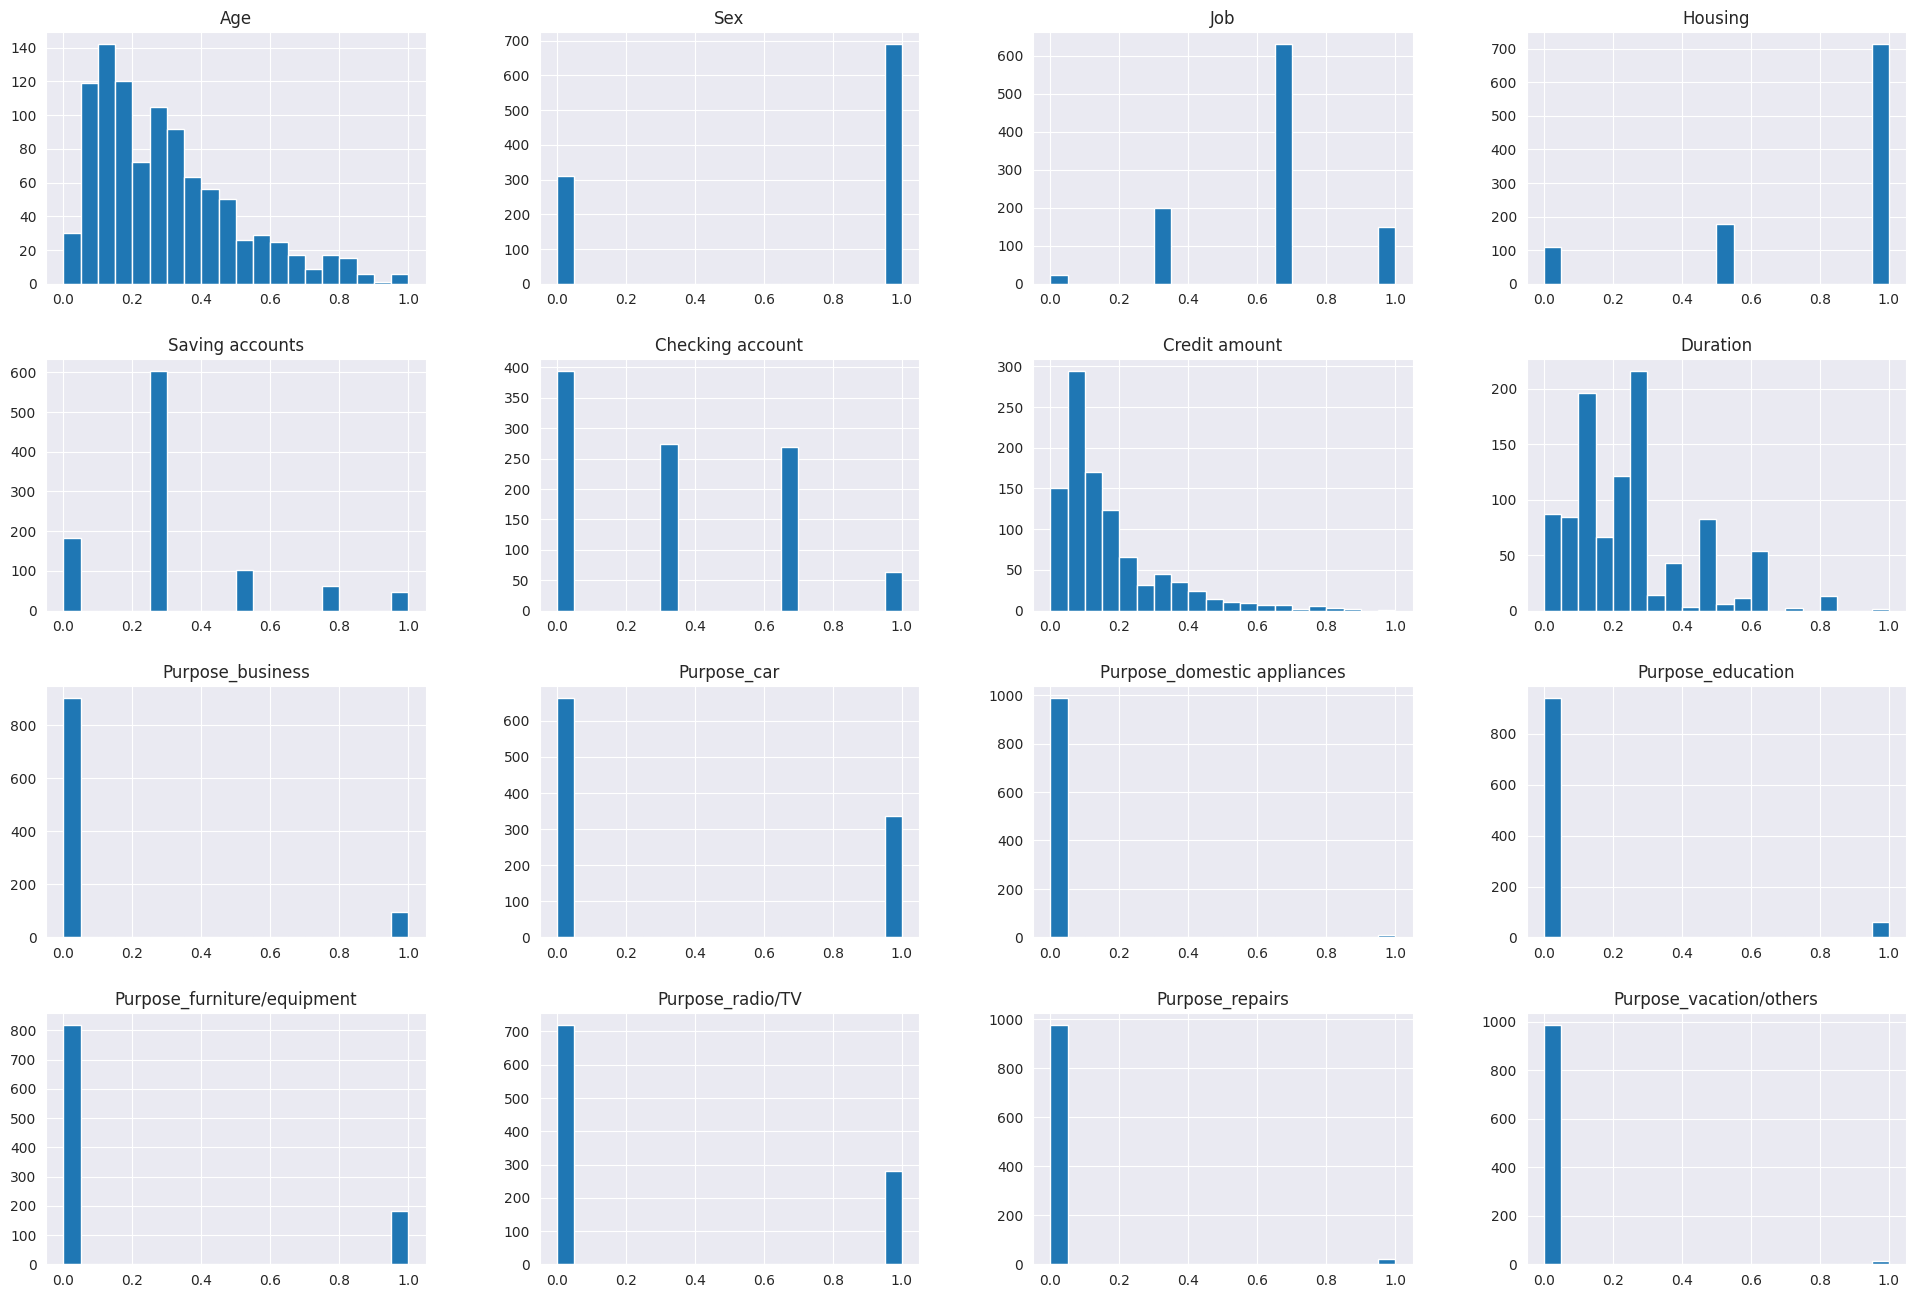

In [118]:
eda_df.hist(figsize=(24, 16), bins=20);

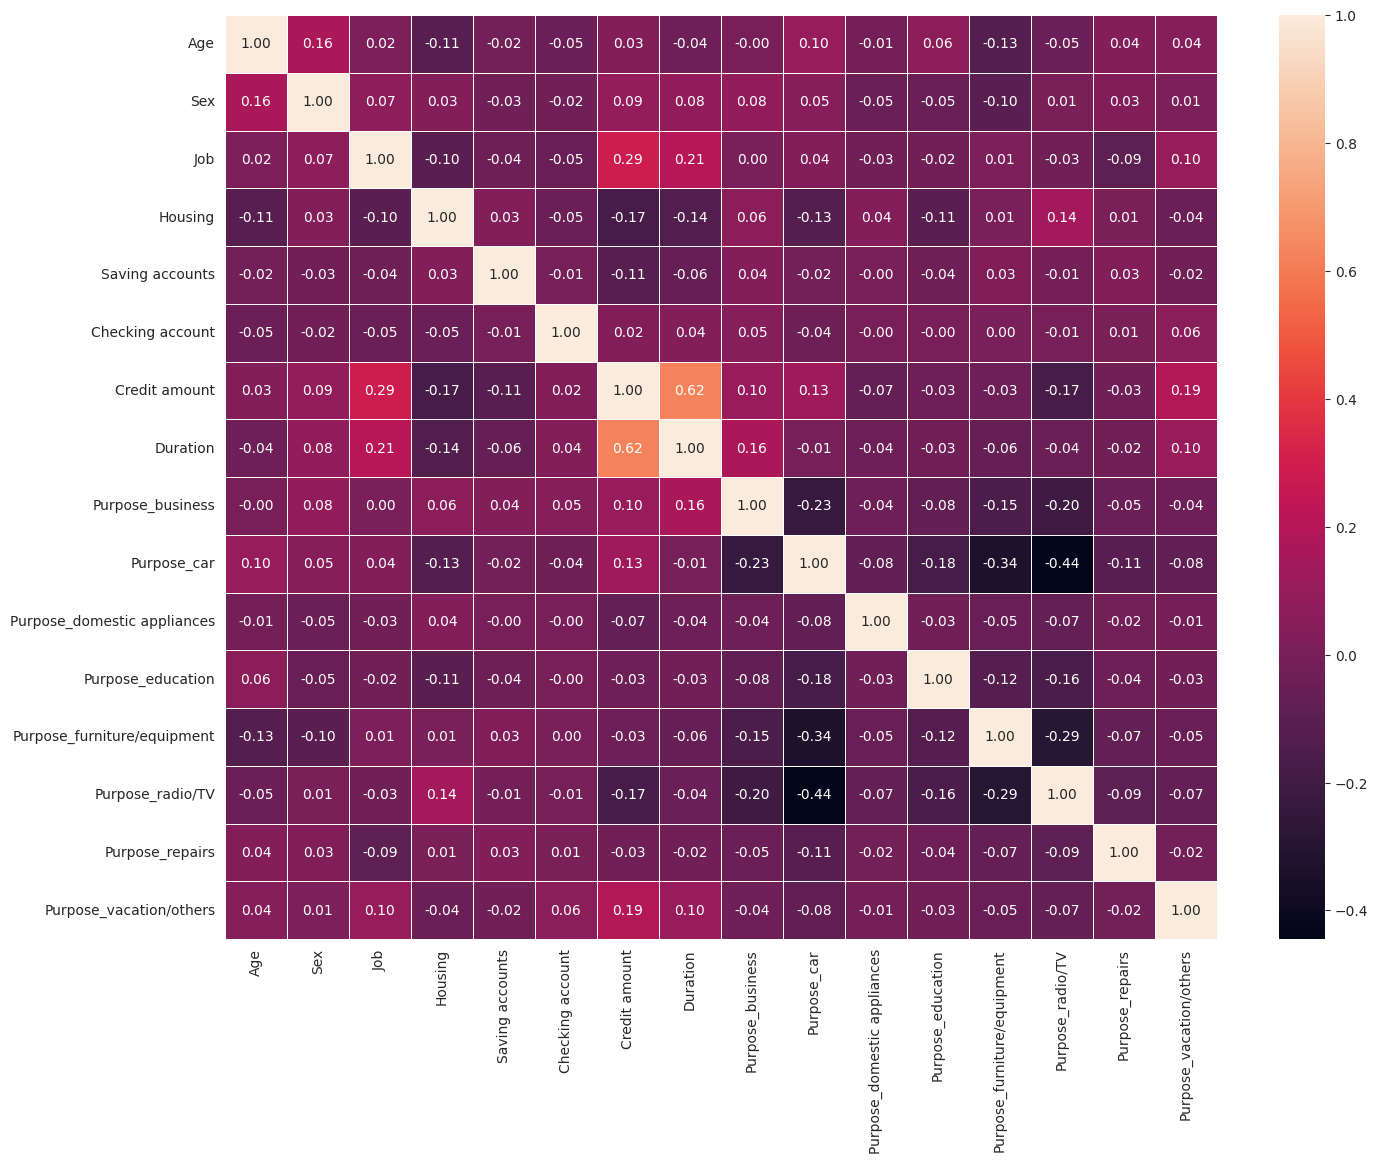

In [119]:
plt.figure(figsize=(16, 12))
sns.heatmap(eda_df.corr(), annot=True, cbar=True, linewidths=.5, fmt= '.2f')
plt.show()

# Часть 2. Моделирование.

## K-means


In [120]:
inertia = []
kmeans_result = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=10).fit(eda_df)
    kmeans_result.append(kmeans)

In [121]:
inertia = []
silhouettes = []
for kmeans in kmeans_result:
    silhouettes.append(silhouette_score(eda_df, kmeans.labels_))
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)


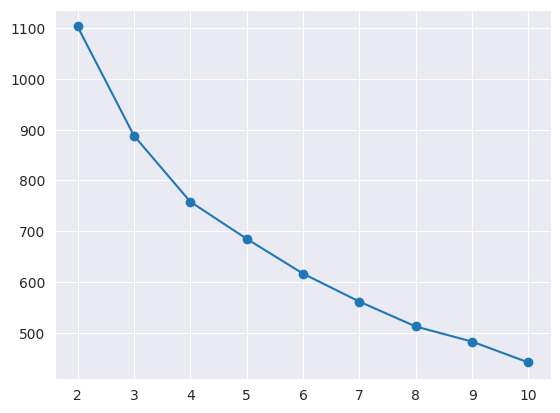

In [123]:
plt.plot(range(kmeans_result[0].n_clusters, kmeans_result[-1].n_clusters+1), inertia, marker='o', label='Inertia')

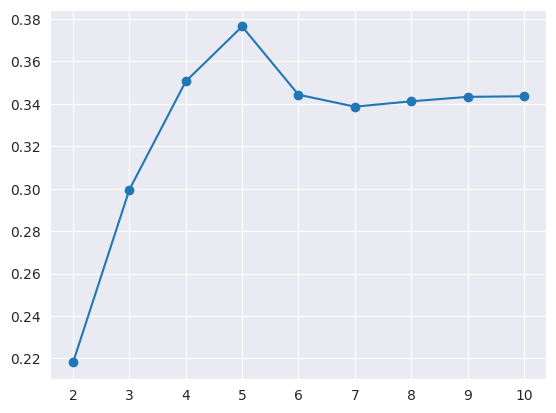

In [124]:
plt.plot(range(kmeans_result[0].n_clusters, kmeans_result[-1].n_clusters+1), silhouettes, marker='o', label='Silhouette')

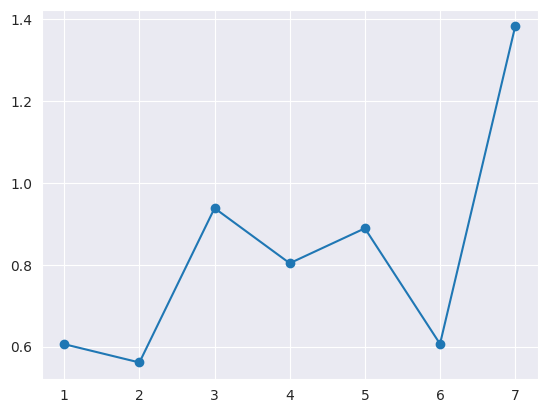

In [125]:
D = []
for i in range(1, len(inertia)-1):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)
plt.plot(range(1, len(inertia)-1), D, marker='o');

Судя по инерции, по методу локтя, можно брать 5, 7 и 9 кластеров. Силуэт лучше всего на 5

### Сжатие пространства. PCA.


Оценим информативность компонент

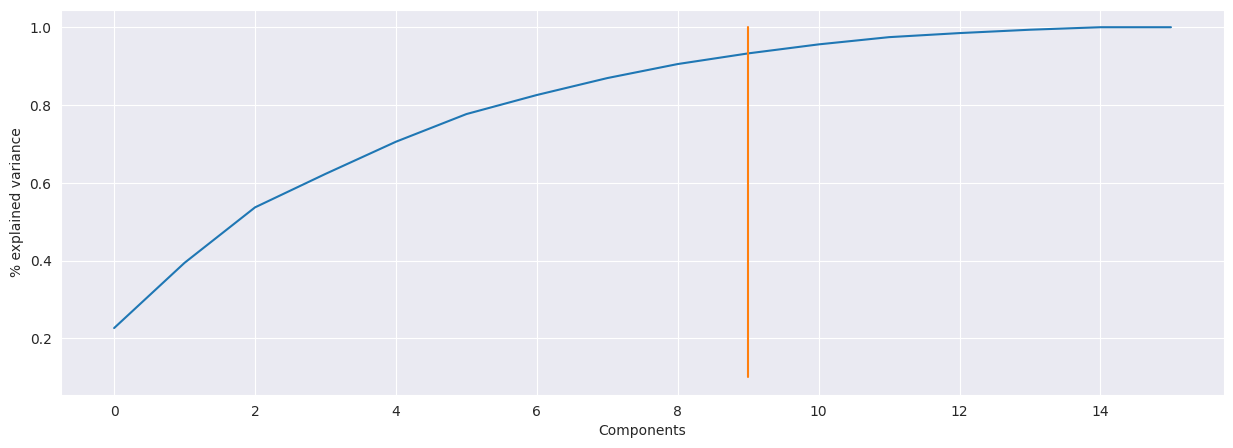

In [126]:
pca = PCA()
pca.fit(eda_df)
csum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(csum >= 0.9) + 1
plt.figure(figsize=(15, 5))
plt.plot(csum)
plt.plot([d, d], [0.1, 1])
plt.xlabel("Components")
plt.ylabel("% explained variance")
plt.show()

Попробуем визуализировать, проведя через PCA с 2мя компонентами.


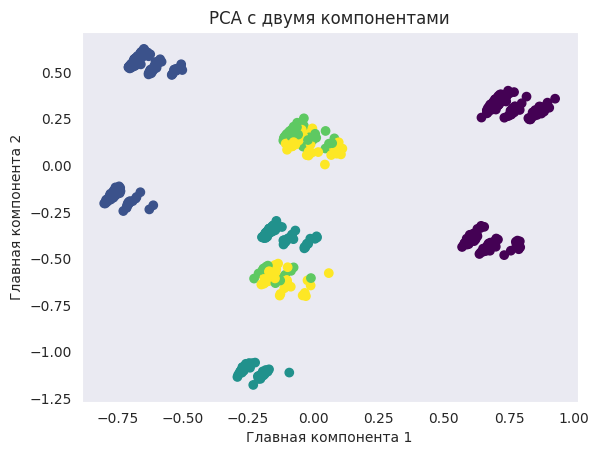

In [127]:

pca_2 = PCA(n_components=2)
df_pca2 = pca_2.fit_transform(eda_df)
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], c=kmeans_result[3].labels_, cmap='viridis')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA с двумя компонентами')
plt.grid()
plt.show()

Попробуем теперь с 3мя компонентами

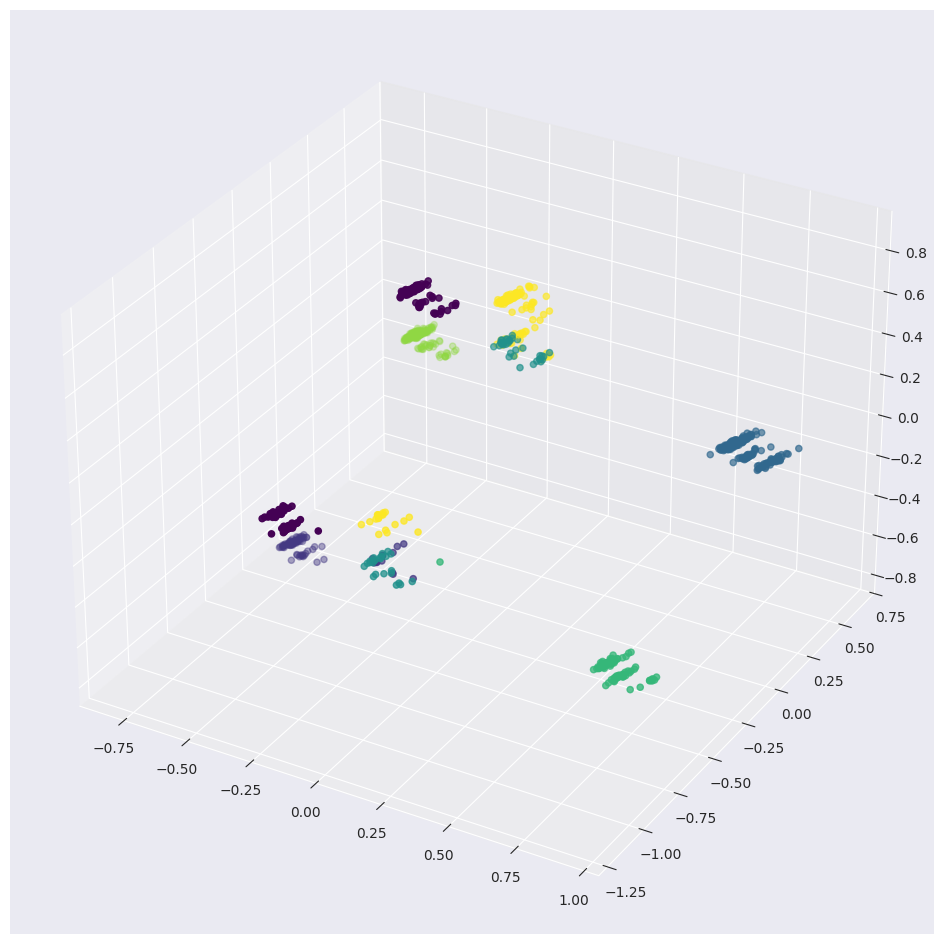

In [128]:
pca_3 = PCA(n_components=3)
df_pca3 = pca_3.fit_transform(eda_df)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca3[:, 0], df_pca3[:, 1], df_pca3[:, 2], c=kmeans_result[5].labels_, cmap='viridis',)
plt.show()


Вроде есть закономерность, но из-за угла зрения не совсем понятно. Попробуем другую визуализацию.

In [130]:
fig = px.scatter_3d(df_pca3, x=0, y=1, z=2,
                    color=kmeans_result[5].labels_,  # Цвет по кластерам
                    opacity=0.8,)
fig.show(renderer="browser")

### UMAP

/home/raulett/store_vol/YandexDisk/Learning/Cources/20240130_OTUS_Machine_Learning/Professional/HW/02_clustering_dim_reduction/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



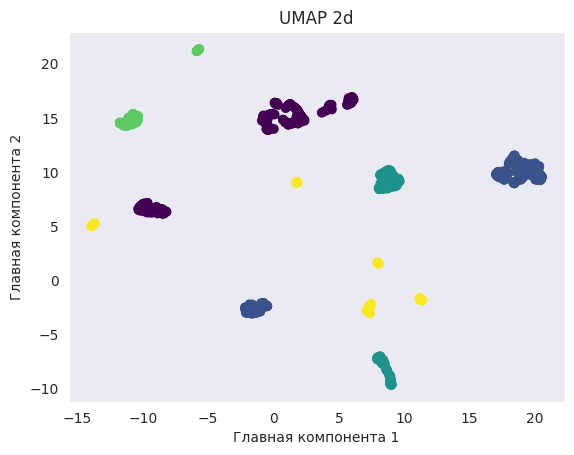

In [131]:
umap_2d = umap.UMAP(n_components=2,)
eda_df_2d = umap_2d.fit_transform(eda_df)
plt.scatter(eda_df_2d[:, 0], eda_df_2d[:, 1], c=kmeans_result[3].labels_, cmap='viridis')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('UMAP 2d')
plt.grid()
plt.show()

/home/raulett/store_vol/YandexDisk/Learning/Cources/20240130_OTUS_Machine_Learning/Professional/HW/02_clustering_dim_reduction/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



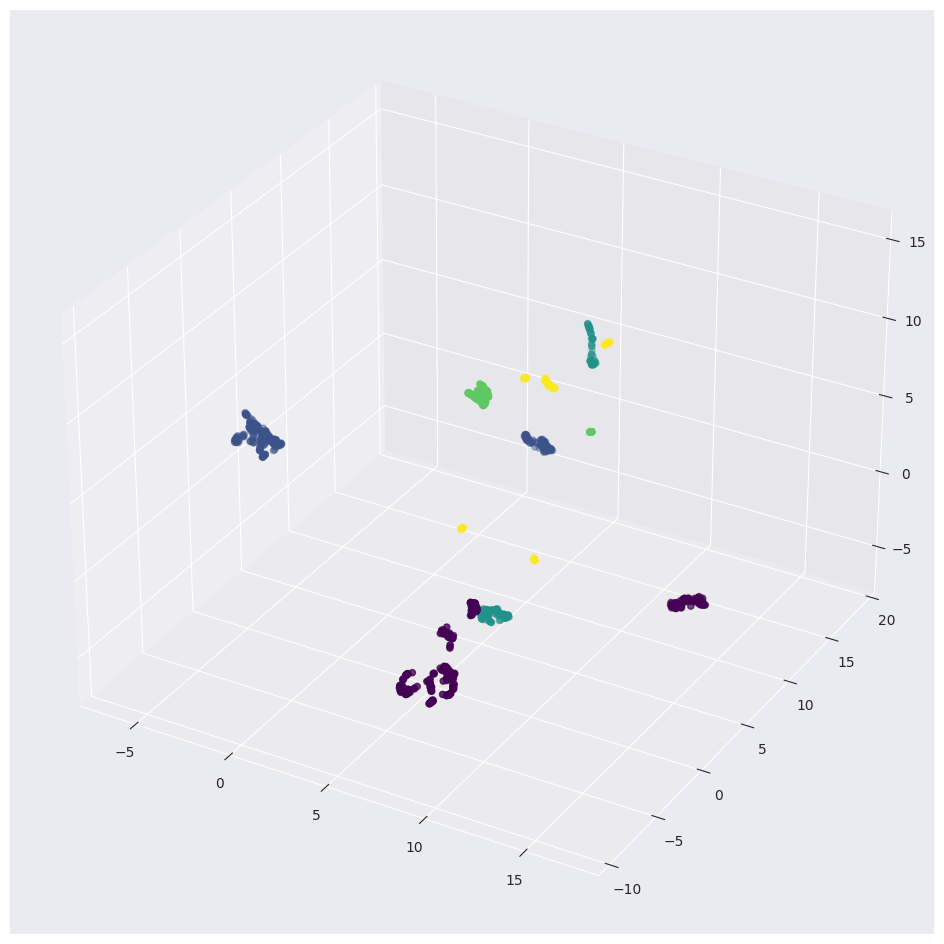

In [132]:
### UMAP
umap_3d = umap.UMAP(n_components=3, )
eda_df_3d = umap_3d.fit_transform(eda_df)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eda_df_3d[:, 0], eda_df_3d[:, 1], eda_df_3d[:, 2], c=kmeans_result[3].labels_, cmap='viridis')
plt.show()

In [133]:
fig = px.scatter_3d(eda_df_3d, x=0, y=1, z=2,
                    color=kmeans_result[5].labels_,  # Цвет по кластерам
                    opacity=0.8,)
fig.show(renderer="browser")

### t-SNE
Рассмотрим результаты кластеризации методом tSNE

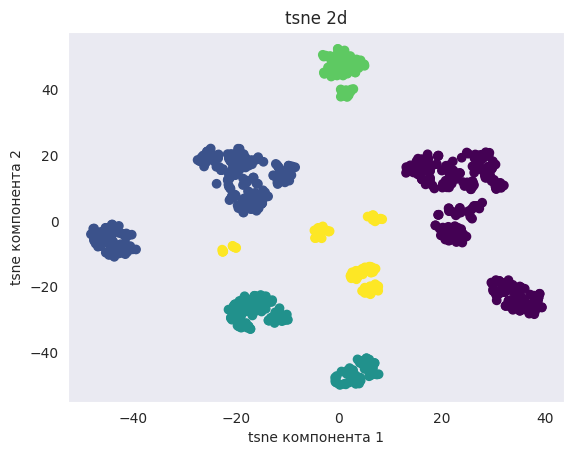

In [134]:
# tSNE 2d
tsne_2 = TSNE(n_components=2, )
tsne2_eda_df = tsne_2.fit_transform(eda_df)
plt.scatter(tsne2_eda_df[:, 0], tsne2_eda_df[:, 1], c=kmeans_result[3].labels_, cmap='viridis')
plt.xlabel('tsne компонента 1')
plt.ylabel('tsne компонента 2')
plt.title('tsne 2d')
plt.grid()
plt.show()

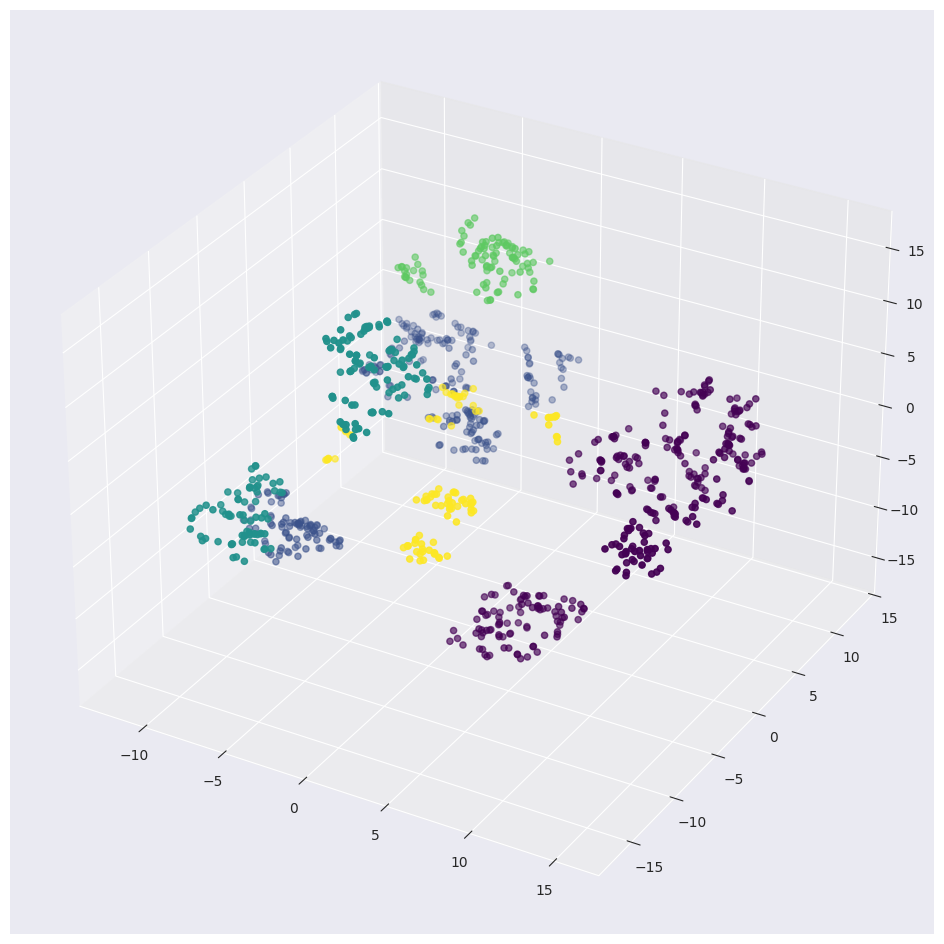

In [135]:
# tSNE 3d
tsne_3d = TSNE(n_components=3, )
tsne3_eda_df = tsne_3d.fit_transform(eda_df)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne3_eda_df[:, 0], tsne3_eda_df[:, 1], tsne3_eda_df[:, 2], c=kmeans_result[3].labels_, cmap='viridis')
plt.show()

In [136]:
fig = px.scatter_3d(tsne3_eda_df, x=0, y=1, z=2,
                    color=kmeans_result[5].labels_,  # Цвет по кластерам
                    opacity=0.8,)
fig.show(renderer="browser")

## Hierarhical

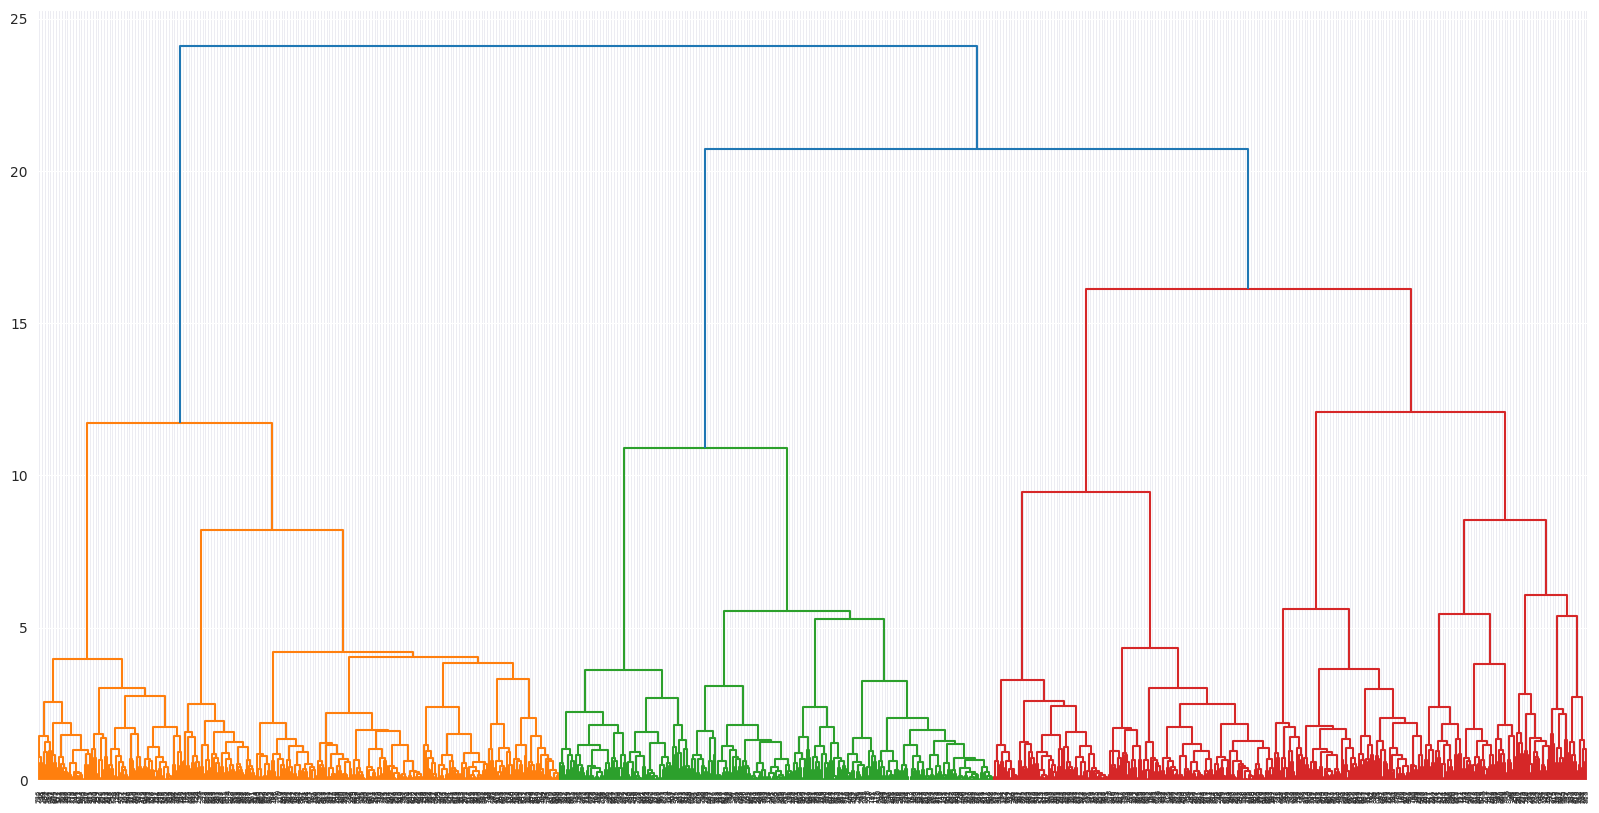

In [137]:
plt.figure(figsize=(20,10))
linkage_ = linkage(eda_df, method='ward')
dendrogram_ = dendrogram(linkage_)

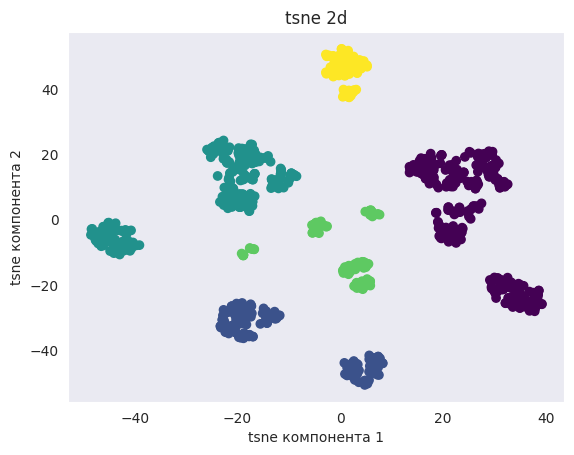

In [138]:
agg = AgglomerativeClustering(n_clusters=5).fit(eda_df)
# tSNE 2d
tsne_2 = TSNE(n_components=2, )
tsne2_eda_df = tsne_2.fit_transform(eda_df)
plt.scatter(tsne2_eda_df[:, 0], tsne2_eda_df[:, 1], c=agg.labels_, cmap='viridis')
plt.xlabel('tsne компонента 1')
plt.ylabel('tsne компонента 2')
plt.title('tsne 2d')
plt.grid()
plt.show()

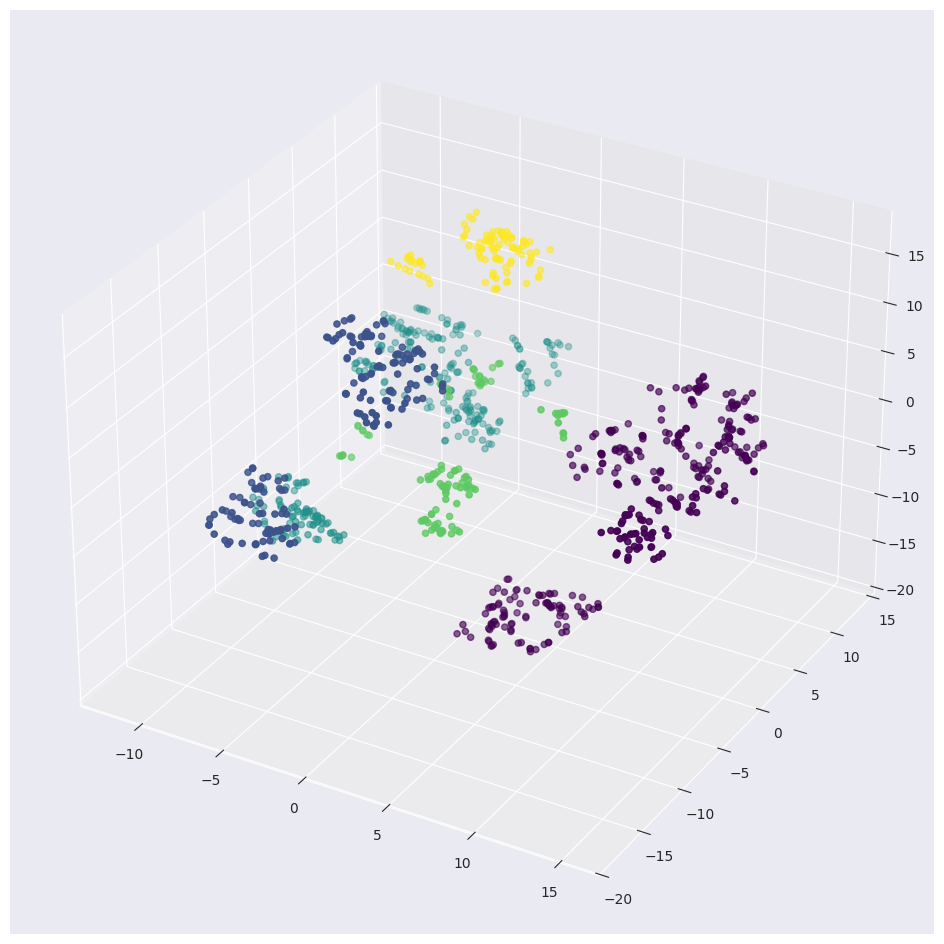

In [139]:
# tSNE 3d for AgglomerativeClustering
tsne_3d = TSNE(n_components=3, )
tsne3_eda_df = tsne_3d.fit_transform(eda_df)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne3_eda_df[:, 0], tsne3_eda_df[:, 1], tsne3_eda_df[:, 2], c=agg.labels_, cmap='viridis')
plt.show()

## DBSCAN

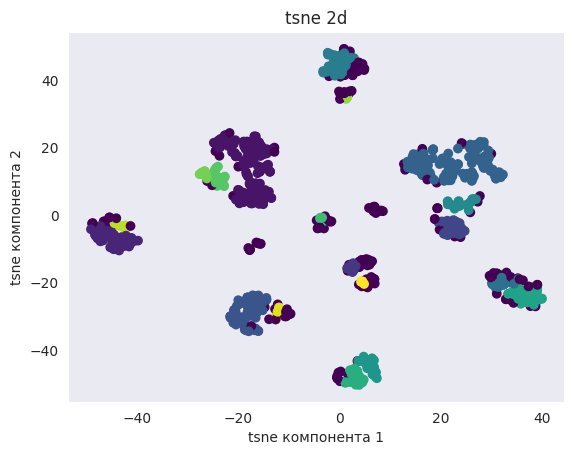

In [140]:
# DBSCAN по умолчанию
dbscan = DBSCAN().fit(eda_df)
np.unique(dbscan.labels_)
# tSNE 2d
tsne_2 = TSNE(n_components=2, )
tsne2_eda_df = tsne_2.fit_transform(eda_df)
plt.scatter(tsne2_eda_df[:, 0], tsne2_eda_df[:, 1], c=dbscan.labels_, cmap='viridis')
plt.xlabel('tsne компонента 1')
plt.ylabel('tsne компонента 2')
plt.title('tsne 2d')
plt.grid()
plt.show()

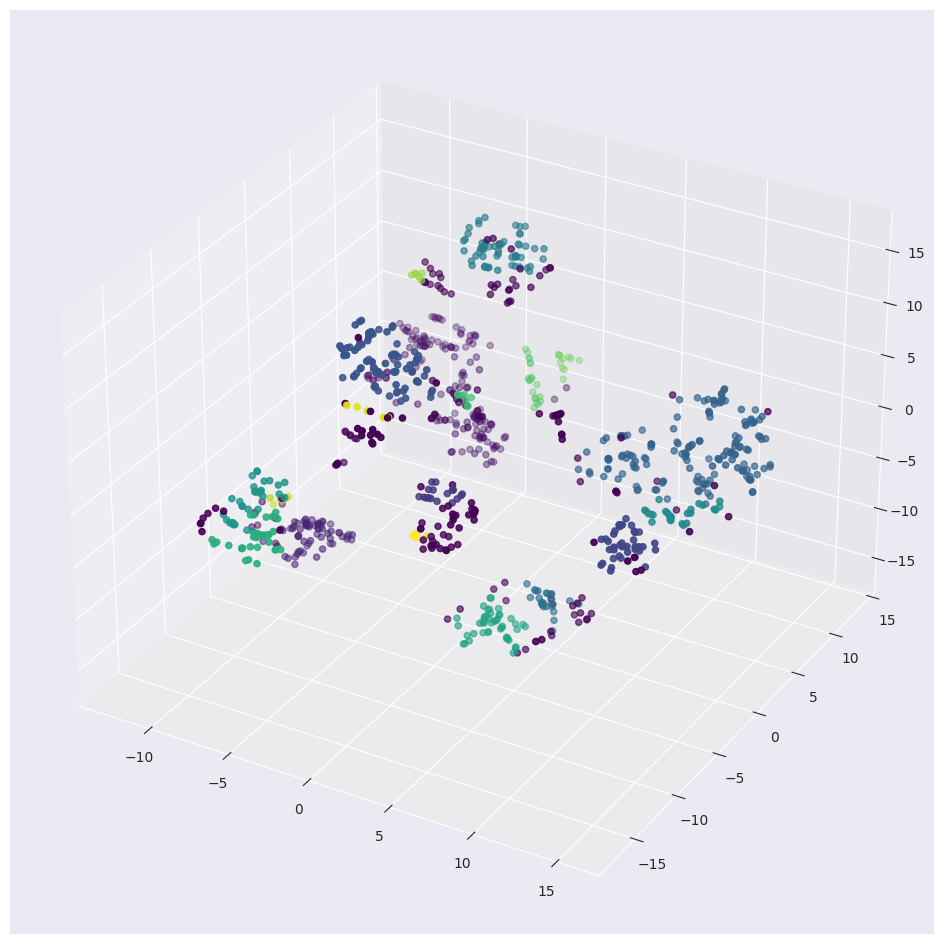

In [141]:
# tSNE 3d for ВИЫСФТ
tsne_3d = TSNE(n_components=3, )
tsne3_eda_df = tsne_3d.fit_transform(eda_df)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne3_eda_df[:, 0], tsne3_eda_df[:, 1], tsne3_eda_df[:, 2], c=dbscan.labels_, cmap='viridis')
plt.show()

# Часть 3. Интерпретация.
KMeans


In [142]:
german_credit_df.shape

(1000, 10)

In [143]:
kmeans_result[3].labels_.shape

(1000,)

In [172]:
german_credit_df_labeled = german_credit_df.copy()
german_credit_df_labeled['labels'] = kmeans_result[3].labels_
german_credit_df_labeled

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,labels
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,4
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,2
4,4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,2
996,996,40,male,3,own,little,little,3857,30,car,0
997,997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,998,23,male,2,free,little,little,1845,45,radio/TV,1


Рассмотрим первый кластер

In [173]:
# Рассмотрим первый кластер
german_credit_df_labeled[german_credit_df_labeled['labels'] == 0].describe()

,Unnamed: 0,Age,Job,Credit amount,Duration,labels
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.0
mean,522.569733,37.139466,1.937685,3768.192878,20.813056,0.0
std,285.080600,11.649960,0.735356,3123.594488,11.980046,0.0
min,4.000000,20.000000,0.000000,250.000000,4.000000,0.0
25%,293.000000,28.000000,2.000000,1364.000000,12.000000,0.0
50%,523.000000,35.000000,2.000000,2679.000000,18.000000,0.0
75%,772.000000,43.000000,2.000000,5248.000000,24.000000,0.0
max,999.000000,75.000000,3.000000,14896.000000,60.000000,0.0


In [174]:
german_credit_df_labeled['Sex'].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

In [175]:
german_credit_df_labeled['labels'].unique()

array([1, 4, 2, 0, 3], dtype=int32)

In [176]:
german_credit_df_labeled.drop('Unnamed: 0', axis=1, inplace=True)


In [177]:
german_credit_df_labeled['Sex'] = german_credit_df_labeled['Sex'].map({'male': 1, 'female': 0})
german_credit_df_labeled['Housing'] = german_credit_df_labeled['Housing'].map({'free': 0, 'rent': 1, 'own': 2})
german_credit_df_labeled['Saving accounts'] = german_credit_df_labeled['Saving accounts'].map({np.nan: 0, 'little': 1, 'moderate': 2, 'quite rich': 3, 'rich': 4})
german_credit_df_labeled['Checking account'] = german_credit_df_labeled['Checking account'].map({np.nan: 0, 'little': 1, 'moderate': 2, 'rich': 3})
german_credit_df_labeled

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,labels
0,67,1,2,2,0,1,1169,6,radio/TV,1
1,22,0,2,2,1,2,5951,48,radio/TV,1
2,49,1,1,2,1,0,2096,12,education,4
3,45,1,2,0,1,1,7882,42,furniture/equipment,2
4,53,1,2,0,1,1,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,1,0,1736,12,furniture/equipment,2
996,40,1,3,2,1,1,3857,30,car,0
997,38,1,2,2,1,0,804,12,radio/TV,1
998,23,1,2,0,1,1,1845,45,radio/TV,1


In [178]:
(german_credit_df_labeled[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'labels']]
 .groupby('labels')
 .agg(['mean', 'std', 'median',
       pd.NamedAgg(column="25% quantile", aggfunc=lambda x: x.quantile(0.25)),
       pd.NamedAgg(column="75% quantile", aggfunc=lambda x: x.quantile(0.75)),
       ]))

Age                                                   Job  \
             mean        std median 25% quantile 75% quantile      mean   
labels                                                                    
0       37.139466  11.649960   35.0         28.0        43.00  1.937685   
1       34.700000  11.142736   32.0         26.0        40.25  1.875000   
2       32.458564   9.747632   30.0         25.0        39.00  1.922652   
3       35.484536  11.401858   33.0         27.0        39.00  1.907216   
4       38.066667  12.402130   35.0         27.0        47.00  1.838095   

                                                   ... Credit amount  \
             std median 25% quantile 75% quantile  ...          mean   
labels                                             ...                 
0       0.735356    2.0          2.0          2.0  ...   3768.192878   
1       0.557211    2.0          2.0          2.0  ...   2487.653571   
2       0.562322    2.0          2.0          2.0  ...   3066.988950   
3       0.662735    2.0          2.0          2.0  ...   4158.041237   
4       0.748380    2.0          1.0          2.0  ...   3298.847619   

                                                        Duration             \
                std  median 25% quantile 75% quantile       mean        std   
labels                                                                        
0       3123.594488  2679.0       1364.0       5248.0  20.813056  11.980046   
1       2073.693150  1890.0       1261.0       3038.0  20.046429  12.171180   
2       2034.146228  2578.0       1747.0       3643.0  19.292818   9.421453   
3       3231.484456  3161.0       1908.0       5293.0  26.938144  13.307121   
4       3663.074032  1597.0       1164.0       3872.0  20.676190  13.345624   

                                         
       median 25% quantile 75% quantile  
labels                                   
0        18.0         12.0         24.0  
1        18.0         12.0         24.0  
2        18.0         12.0         24.0  
3        24.0         18.0         36.0  
4        15.0         12.0         24.0  

[5 rows x 35 columns]

In [179]:
def category_frequency(series: pd.Series):
    mode_value = series.mode()[0]
    mode_ratio = (series == mode_value).mean() * 100
    return pd.Series({"most_frequent": series.mode()[0], "percentage": mode_ratio,})
german_credit_df_labeled.groupby("labels")['Purpose'].apply(category_frequency)

labels               
0       most_frequent                    car
        percentage                     100.0
1       most_frequent               radio/TV
        percentage                     100.0
2       most_frequent    furniture/equipment
        percentage                     100.0
3       most_frequent               business
        percentage                     100.0
4       most_frequent              education
        percentage                 56.190476
Name: Purpose, dtype: object

Кластеризация в основном разделила заемщиков по признаку "Цель займа". Остальные признаки имеют малую вариативность от кластера к кластеру.
Нулевой кластер занимает деньги на автомобили. В него входят в среднем более возрастные люди с высокой и очень высокой квалификацией.
Мебель покупают более молодые люди, также с высокой и очень высокой квалификацией.
Люди работающие на более низкоквалифицированных рабочих местах в среднем чаще берут кредиты на образование.
Люди, берущие кредиты на открытие бизнеса и покупку телевизора в среднем имеют лучшие жилищные условия (что странно)
Люди, имеющие больше накоплений на сберегательном счете чаще берут кредиты на открытие бизнеса и на мебель.

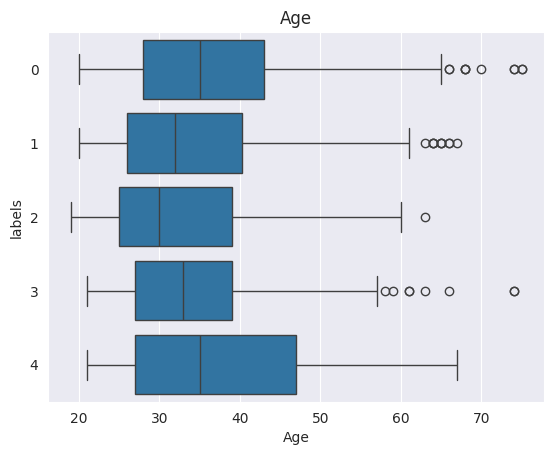

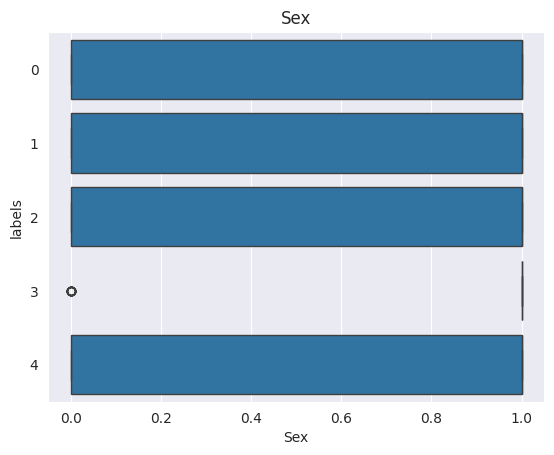

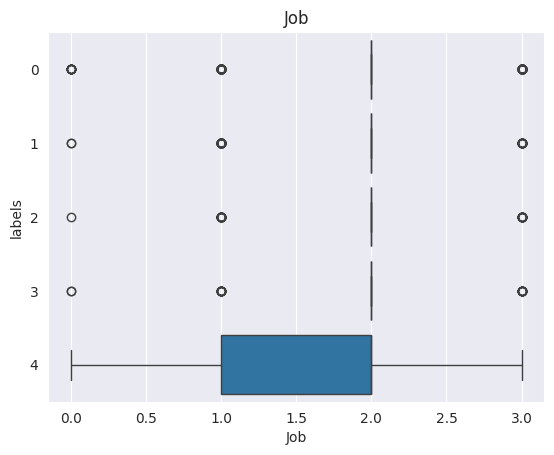

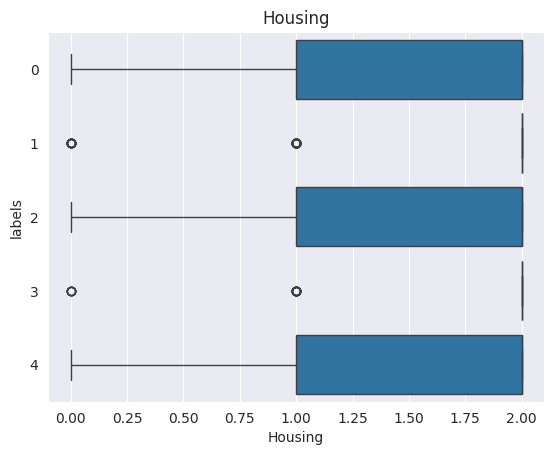

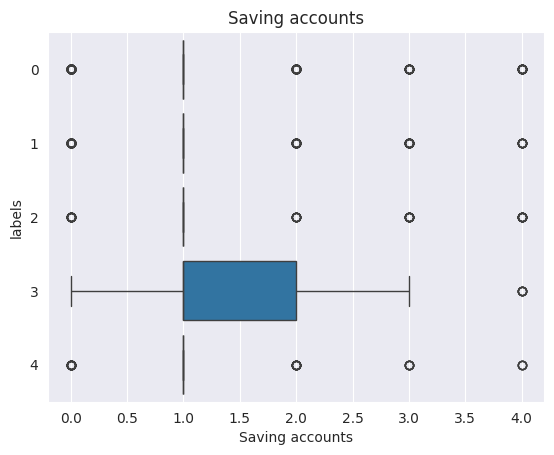

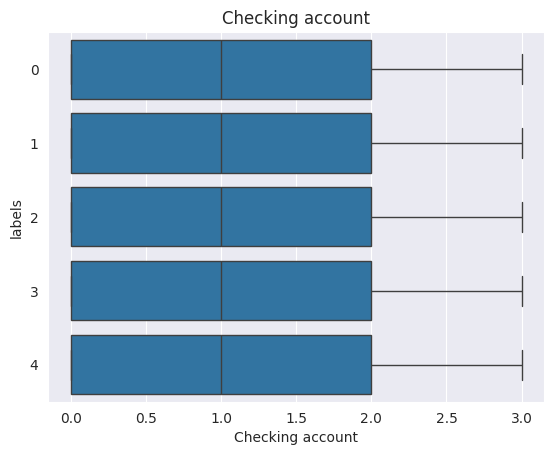

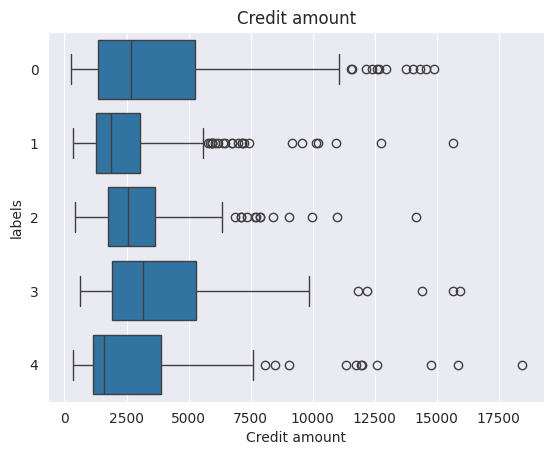

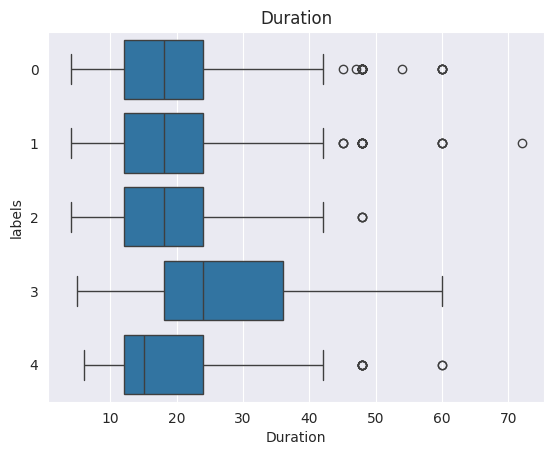

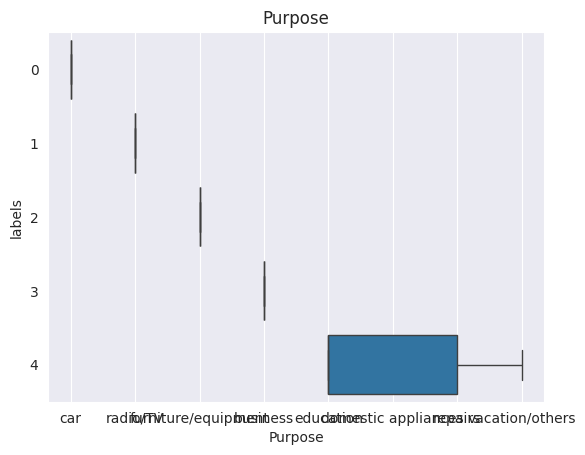

In [184]:
for col in german_credit_df_labeled.loc[:, german_credit_df_labeled.columns != 'labels'].columns:
    sns.boxplot(data=german_credit_df_labeled, x=col, y=german_credit_df_labeled['labels'], orient='h')
    plt.title(col)
    plt.show();

Из построенных графиков можно понять, что наибольший вклад в кластеризацию внес признак "назначение кредита".
Могу предположить, что причина заключается в примененном для преобразования методе One-hot-encoding, из-за чего этот признак разбился на несколько и таким образом увеличился его вклад в результаты кластеризации.